# Setting up the environment

In [1]:
!git clone https://github.com/huggingface/diffusers
!pip install /kaggle/working/diffusers/
!pip install -r /kaggle/working/diffusers/examples/dreambooth/requirements.txt
!pip install bitsandbytes

Cloning into 'diffusers'...
remote: Enumerating objects: 54539, done.
remote: Counting objects: 100% (1936/1936), done.
remote: Compressing objects: 100% (1140/1140), done.
remote: Total 54539 (delta 1037), reused 1419 (delta 707), pack-reused 52603
Receiving objects: 100% (54539/54539), 39.62 MiB | 17.43 MiB/s, done.
Resolving deltas: 100% (38709/38709), done.
Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for huggingface-hub>=0.20.2 from https://files.pythonhosted.org/packages/28/03/7d3c7153113ec59cfb31e3b8ee773f5f420a0dd7d26d40442542b96675c3/huggingface_hub-0.20.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB 12.3 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.27.0.dev0-py3-none-any.whl size=1948688 sha256=a7df91f17580efd396521dde85df6102120587868a39f3841e8fdb6b82665ab9
  Stored 

In [2]:
from accelerate.utils import write_basic_config

write_basic_config()

PosixPath('/root/.cache/huggingface/accelerate/default_config.yaml')

In [3]:
!accelerate launch diffusers/examples/dreambooth/train_dreambooth.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5"  \
  --instance_data_dir="./loubisark_shoes" \
  --output_dir="./loubisark_shoes_gen" \
  --instance_prompt="a photo of xyz shoes" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=1000 \
  --gradient_checkpointing \
  --use_8bit_adam

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
tokenizer/tokenizer_config.json: 100%|█████████| 806/806 [00:00<00:00, 6.25MB/s]
tokenizer/vocab.json: 100%|████████████████| 1.06M/1.06M [00:00<00:00, 3.20MB/s]
tokenizer/merges.txt: 100%|██████████████████| 525k/525k [00:00<00:00, 2.15MB/s]
text_encoder/config.json: 100%|████████████████| 617/617 [00:00<00:00, 4.38MB/s]
You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
scheduler/scheduler_config.json: 100%|█████████| 308/308 [00:00<00:00, 1.75MB/s]
{'clip_sample_range', 'timestep_spacing', 'prediction_type', 'dynamic_thresholding_ratio', 'variance_type', 'rescale_betas_zero_snr', 'thresholding', 'sample_max_value'} was not found in co

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "loubisark-shoes"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

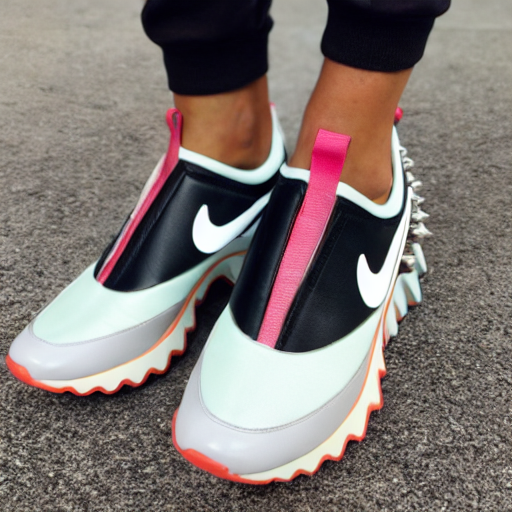

In [6]:
prompt = "nike shoes with wf loubishark style"
pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

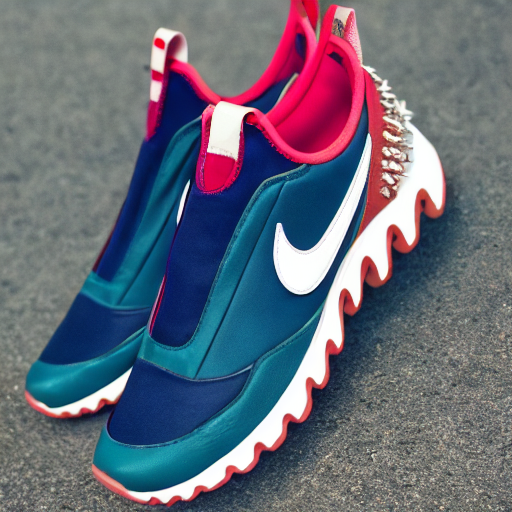

In [9]:
prompt = "nike shoes with wf loubishark style"
pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

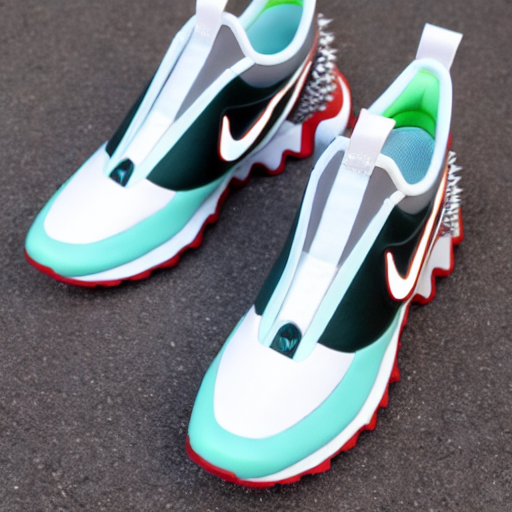

In [11]:
prompt = "nike back to the future shoes with wf loubishark style"
pipe(prompt).images[0]

In [4]:
from diffusers import StableDiffusionInpaintPipeline
import torch

model_id = "loubisark-shoes"
pipe_inpaint = StableDiffusionInpaintPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe_inpaint = pipe_inpaint.to("cuda")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

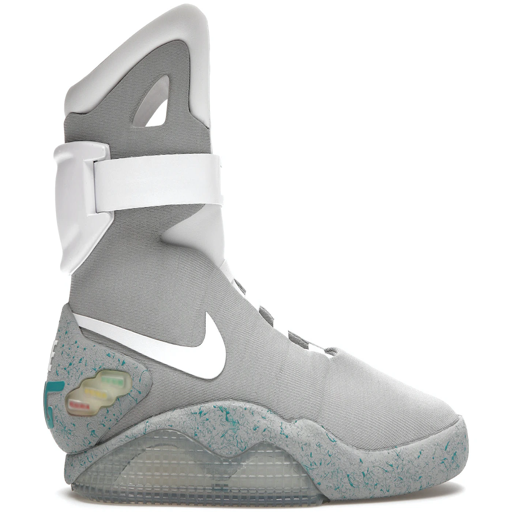

In [8]:
import PIL

nike = PIL.Image.open("./inference_nike_shoe/Nike-Air-Mag-Back-To-The-Future-BTTF-Product.jpg").convert("RGB")
nike = nike.resize((512, 512))
nike

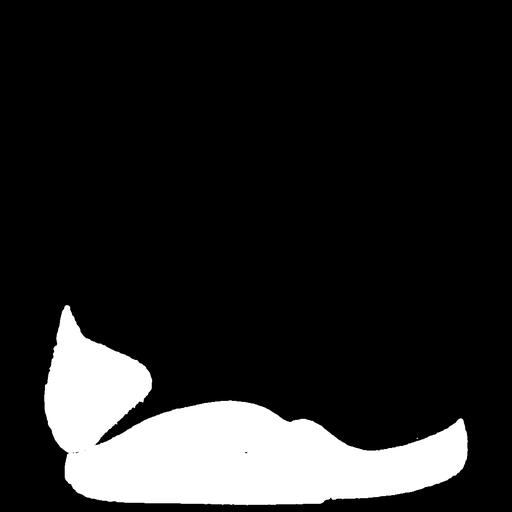

In [9]:
nike_mask = PIL.Image.open("./inference_nike_shoe/nike-air-mag.jpg").convert("RGB")
nike_mask = nike_mask.resize((512, 512))
nike_mask

In [13]:
prompt = "modify the area in loubishark style"

guidance_scale=7.5
num_samples = 3
generator = torch.Generator(device="cuda").manual_seed(0) # change the seed to get different results

images = pipe_inpaint(
    prompt=prompt,
    image=nike,
    mask_image=nike_mask,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

  0%|          | 0/50 [00:00<?, ?it/s]

In [14]:
# insert initial image in the list so we can compare side by side
images.insert(0, nike)

In [11]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

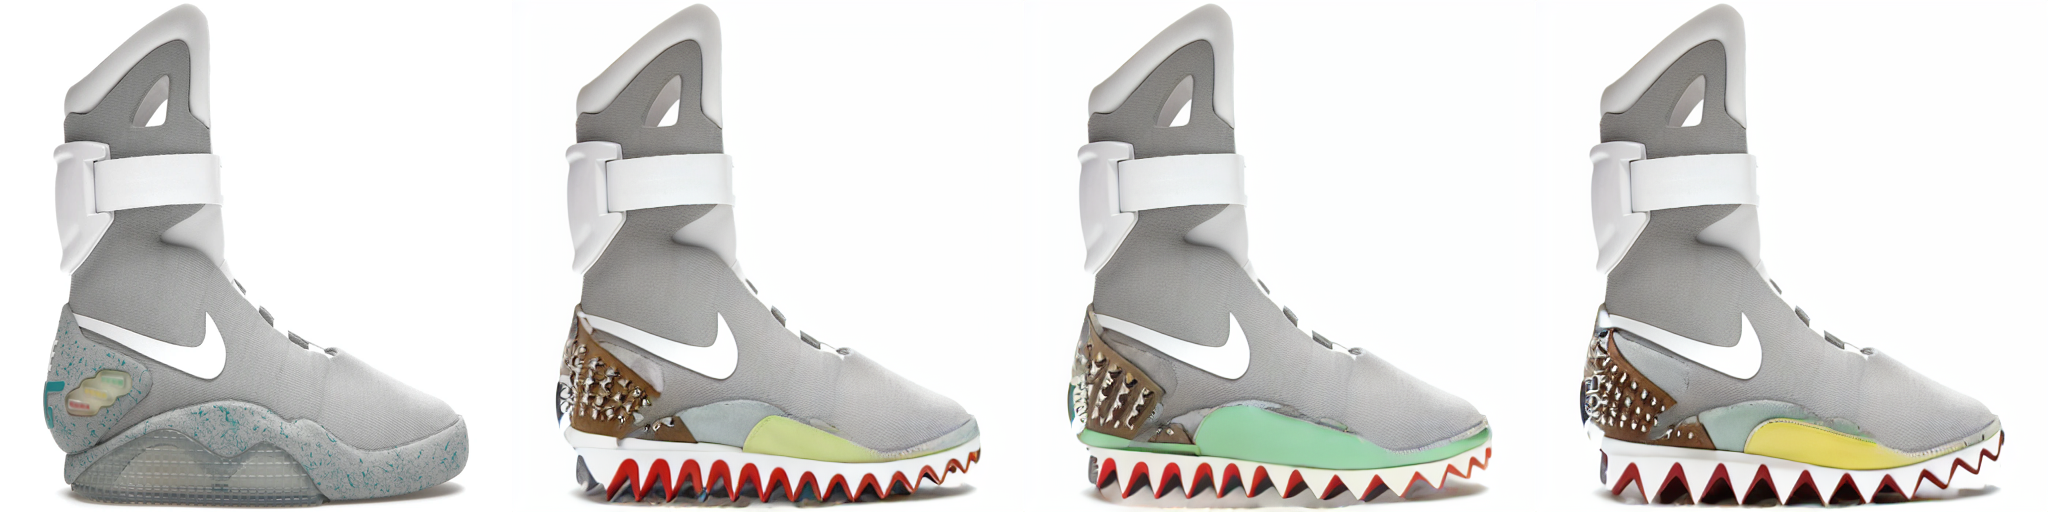

In [16]:
image_grid(images, 1, num_samples + 1)

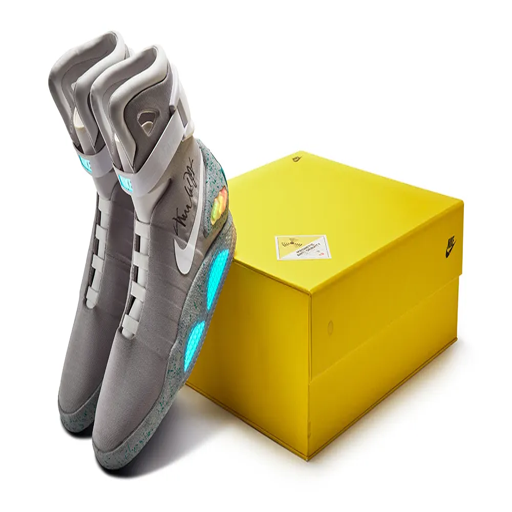

In [5]:
import PIL

nike2 = PIL.Image.open("./nike_shoes_2/mags01.jpg").convert("RGB")
nike2 = nike2.resize((512, 512))
nike2

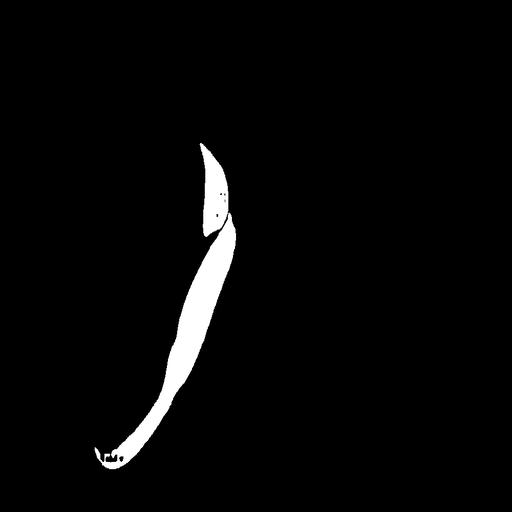

In [9]:
nike_mask2 = PIL.Image.open("./nike_shoes_2/nike-air-mag-2-mask.jpg").convert("RGB")
nike_mask2 = nike_mask2.resize((512, 512))
nike_mask2

In [10]:
prompt = "modify the area in loubishark style"

guidance_scale=7.5
num_samples = 3
generator = torch.Generator(device="cuda").manual_seed(0) # change the seed to get different results

images = pipe_inpaint(
    prompt=prompt,
    image=nike2,
    mask_image=nike_mask2,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

  0%|          | 0/50 [00:00<?, ?it/s]

In [12]:
# insert initial image in the list so we can compare side by side
images.insert(0, nike2)

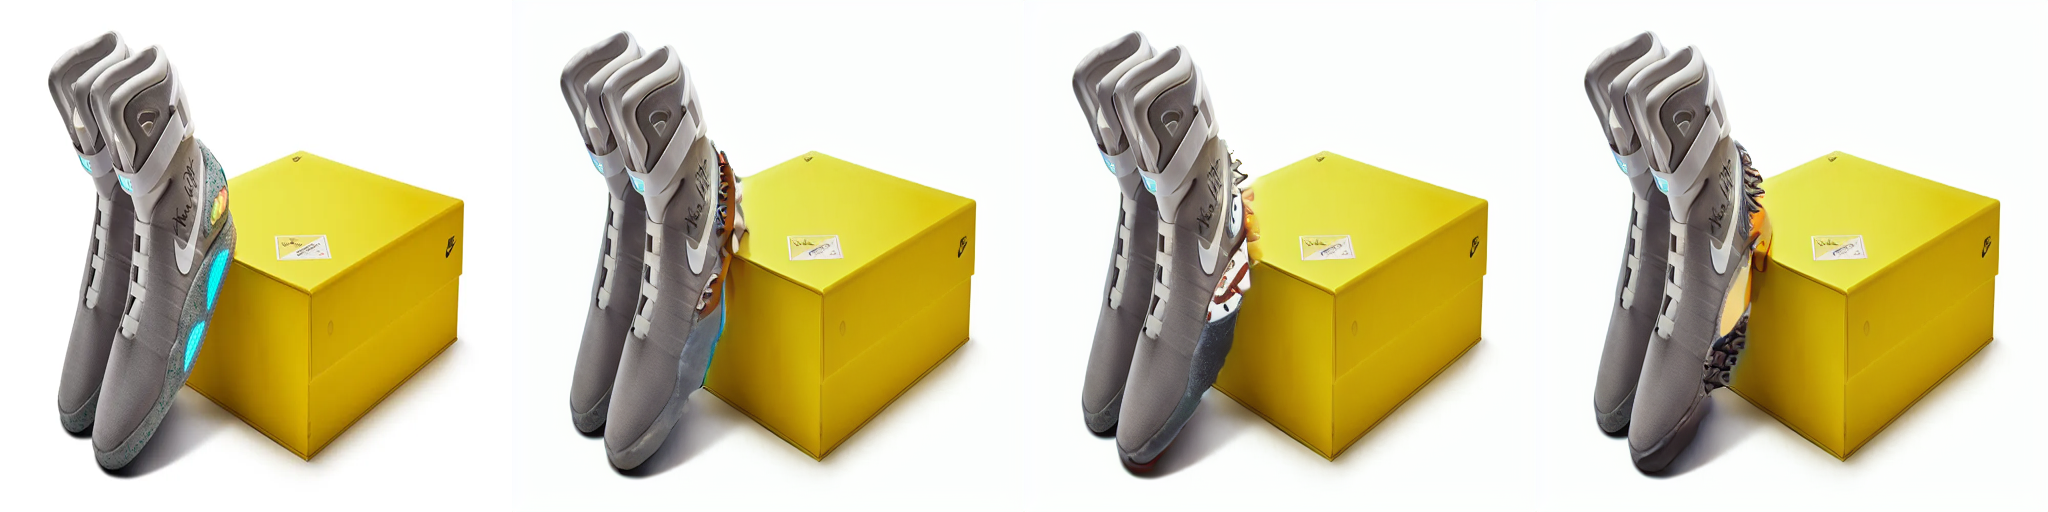

In [13]:
image_grid(images, 1, num_samples + 1)

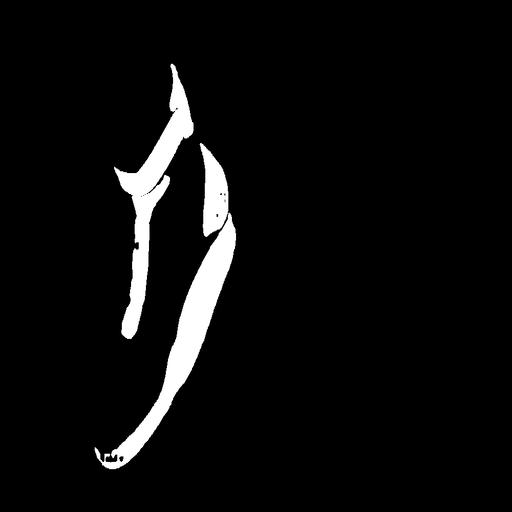

In [6]:
nike_mask3 = PIL.Image.open("./nike_shoes_2/nike-air-mag-2-mask2.jpg").convert("RGB")
nike_mask3 = nike_mask3.resize((512, 512))
nike_mask3

In [11]:
prompt = "modify the area in loubishark style"

guidance_scale=7.5
num_samples = 3
generator = torch.Generator(device="cuda").manual_seed(0) # change the seed to get different results

images = pipe_inpaint(
    prompt=prompt,
    image=nike2,
    mask_image=nike_mask3,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

  0%|          | 0/50 [00:00<?, ?it/s]

In [12]:
# insert initial image in the list so we can compare side by side
images.insert(0, nike2)

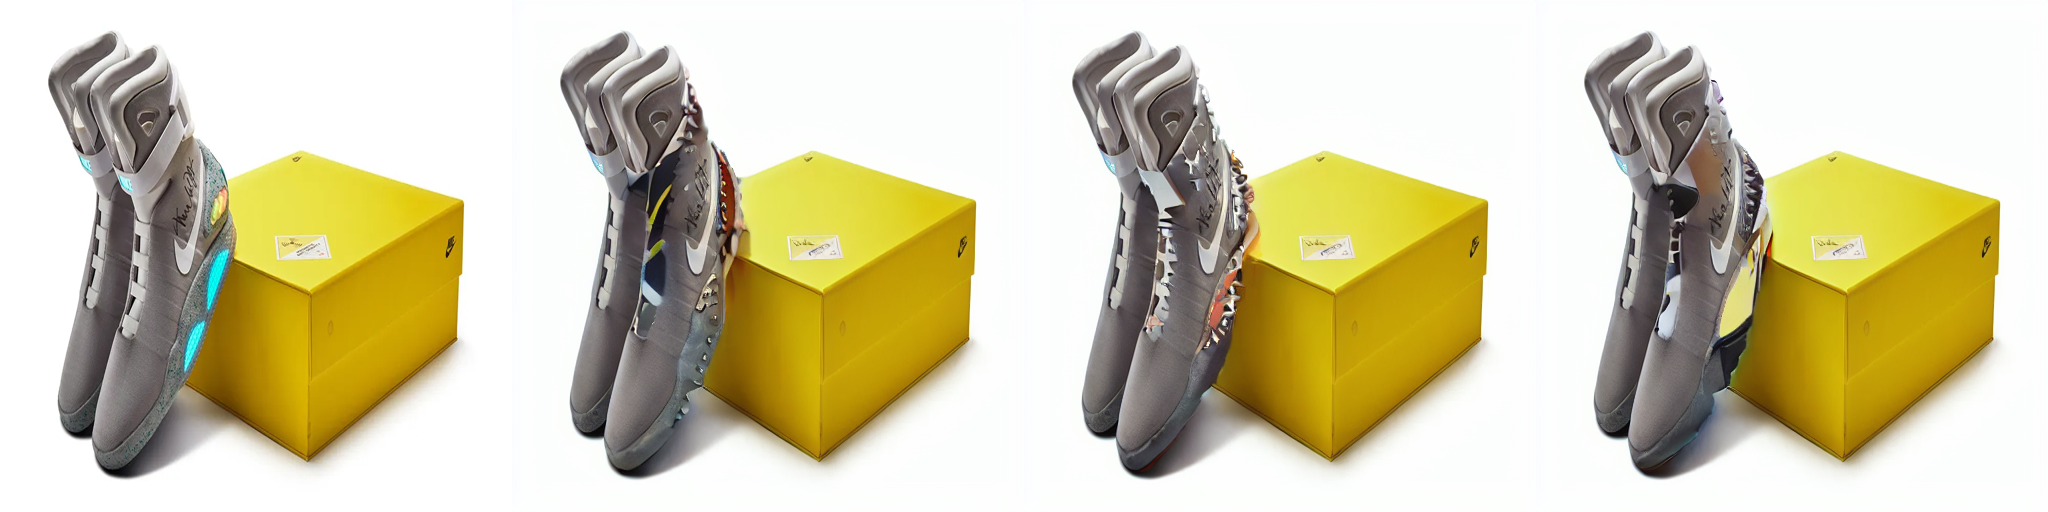

In [13]:
image_grid(images, 1, num_samples + 1)